In [1]:
import astropy.io.fits as fits
import numpy as np
import matplotlib.pyplot as plt
import os
from astropy import units as u
from astropy.coordinates import SkyCoord

In [618]:
Name='photoz_cosmos2020_lephare_classic_v1.out.fits'
path=r'C:\Users\blue\Desktop\Python\Cosmos2020'


hdul = fits.open(os.path.join(path,Name))
#hdul.info()
data = hdul[1].data
#hdul2 = fits.open(os.path.join(path,'COSMOS2015_Laigle+_v1.1.fits'))
#hdul2.info()
#data2 = hdul2[1].data
#hdul[0].header


Name2='COSMOS2020_CLASSIC_v1.5_formatted.fits'

hdul2 = fits.open(os.path.join(path,Name2))
hdul2.info()
data2 = hdul2[1].data

Filename: C:\Users\blue\Desktop\Python\Cosmos2020\COSMOS2020_CLASSIC_v1.5_formatted.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU   1772   1720700R x 614C   [K, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1E, 1E, 1I, 1I, 1I, 1I, 1I, 1D, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1I, 1I, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1I, 1I, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1I, 1I, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1I, 1I, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1I, 1I, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1I, 1I, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1I, 1I, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1I, 1I, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1I, 1I, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1I, 1I, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E

In [627]:
data2[0]

(1, 151.00853357408596, 1.3982782530327036, 1304.9532470703125, 2579.13232421875, 9.16915928534678e-06, 9.59818109701454e-06, -8.461303203077386e-07, 153.95464, 3.5, 0, 1, 1, 1, 1, 0.022075179553080027, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, 3, 8, 14.749553, 0.010909455, 22.747913, 0.018696042, 76.08241, 0.06277491, 20.978052, 0.00080325606, 20.507647, 0.00089256105, 19.196789, 0.0008960488, 19.228949, 0.00090776995, 3, 0, 97.51978, 0.12325739, 140.58467, 0.18836641, 383.4659, 0.18301807, 18.927267, 0.0013726193, 18.530155, 0.0014551083, 17.440683, 0.0005183189, 17.46986, 0.0005253118, 3, 4, 229.9772, 0.18475455, 333.08636, 0.28605017, 866.3665, 0.280283, 17.995789, 0.0008724493, 17.593607, 0.0009326425, 16.555746, 0.00035133783, 16.583054, 0.0003556275, 3, 4, 333.89758, 0.20034683, 490.36365, 0.31173003, 1290.1099, 0.29619917, 17.590967, 0.00065162696, 17.173704, 0.00069038314, 16.123432, 0.0002493371, 16.150173, 0.00025233717

In [4]:
# Absolute magnitudes
# 26    MFUV                 FUV galex  
# 27    MNUV                 NUV galex
# 28    MU                   U  cfht new
# 29    MG                   g  Subaru HSC
# 30    MR                   r  Subaru HSC    
# 31    MI                   i  Subaru HSC 
# 32    MZ                   z  Subaru HSC  
# 33    MY                   VISTA 
# 34    MJ                   VISTA 
# 35    MH                   VISTA
# 36    MK                   VISTA

In [5]:
z=[float('NaN')] * len(data)
idx=[float('NaN')] * len(data)
a=[float('NaN')] * len(data)
d=[float('NaN')] * len(data)
G=[float('NaN')] * len(data)
R=[float('NaN')] * len(data)
I=[float('NaN')] * len(data)
J=[float('NaN')] * len(data)
H=[float('NaN')] * len(data)
K=[float('NaN')] * len(data)

In [6]:
for i in range(0,len(data)):
    if data[i][3]<=1.0:
        continue
    elif data[i][3]==0:
        continue
    elif data[i][3]>=10.0:
        continue
    else:
        idx[i]=data[i][0]#id
        a[i]=data[i][1]#alpha J2000, in deg
        d[i]=data[i][2]#delta J2000, in deg
        z[i]=data[i][3]#redshift, median of the likelihood distribution. 
        G[i]=data[i][28]#g Subaru HSC
        R[i]=data[i][29]#r Subaru HSC
        I[i]=data[i][30]#i Subaru HSC
        J[i]=data[i][33]#J VISTA
        H[i]=data[i][34]#H VISTA
        K[i]=data[i][35]#K VISTA
        
        

In [7]:
z=np.array(z)
idx=np.array(idx)
a=np.array(a)
d=np.array(d)
G=np.array(G)
R=np.array(R)
I=np.array(I)
#Z=np.array(Z)
J=np.array(J)
H=np.array(H)
K=np.array(K)

In [285]:
#Remove nan
znan=z[~np.isnan(z)]
anan=a[~np.isnan(z)]
dnan=d[~np.isnan(z)]
Gnan=G[~np.isnan(z)]
Rnan=R[~np.isnan(z)]
Inan=I[~np.isnan(z)]
#Znan=Z[~np.isnan(z)]
Jnan=J[~np.isnan(z)]
Hnan=H[~np.isnan(z)]
Knan=K[~np.isnan(z)]

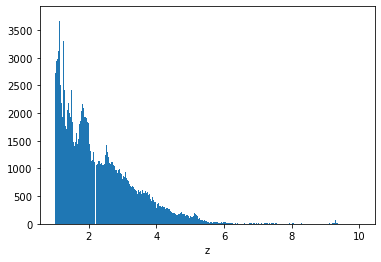

In [579]:
#hist=plt.hist(z,bins='auto')

binwidth=0.01
#print(np.arange(min(znan[idxcatalog[ch]]), max(znan[idxcatalog[ch]]) + binwidth, binwidth))
counts, edges, plot=plt.hist(znan,bins=np.arange(min(znan), max(znan) + binwidth, binwidth))
plt.xlabel('z')
bincenters = np.mean(np.vstack([edges[0:-1],edges[1:]]), axis=0)
#print(bincenters)

In [688]:
zsearch=bincenters[150]#np.median(znan[idxcatalog[ch]])#redshift used to search for cluster
print(bincenters[150])
zsiz=binwidth#0.1#allowed difference in z 

ztemp=znan[znan<zsearch+zsiz]
zlook=ztemp[ztemp>zsearch-zsiz]#array of z for the clusters

atemp=anan[znan<zsearch+zsiz]
alook=atemp[ztemp>zsearch-zsiz]#array of z for the clusters

dtemp=dnan[znan<zsearch+zsiz]
dlook=dtemp[ztemp>zsearch-zsiz]#array of z for the clusters

2.5051000165939348


2676


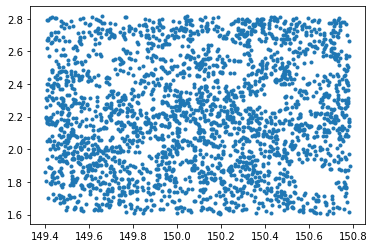

In [689]:
plt.plot(alook,dlook,'.')
print(len(alook))

# Machine learning for clusters

In [691]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot
from sklearn.cluster import Birch
from sklearn.cluster import DBSCAN

# define dataset

corr=[0]*len(alook)
for i in range(0,len(alook)):
    corr[i]=[alook[i], dlook[i]]
#print(corr)

X=np.array(corr)#[alook,dlook]
#X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
print(X)

[[150.681427     1.60406995]
 [150.1953125    1.60661995]
 [150.42871094   1.60827994]
 ...
 [150.12405396   2.81334996]
 [149.65962219   2.81494999]
 [150.04411316   2.81338   ]]


[3 0 3 ... 5 8 5]


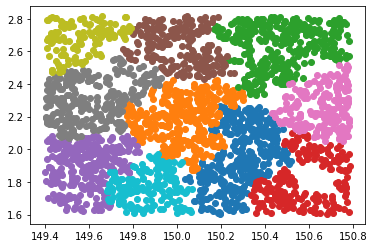

In [692]:

# define the model
model = Birch(threshold=0.01, n_clusters=10)#GaussianMixture(n_components=10)#Birch(threshold=0.01, n_clusters=100)#
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)

#DBSCAN model
#model = DBSCAN(eps=0.30, min_samples=100)
# fit model and predict clusters
#yhat = model.fit_predict(X)

print(yhat)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)#np.array(np.where(yhat == cluster))
    #print(row_ix)
    # create scatter of these samples
    #plt.plot(X[row_ix[0]][0][0], X[row_ix[0]][0][1],'.')
    pyplot.scatter(X[row_ix,0], X[row_ix,1])
# show the plot
pyplot.show()

In [ ]:
print(X[0])

Text(0, 0.5, 'delta')

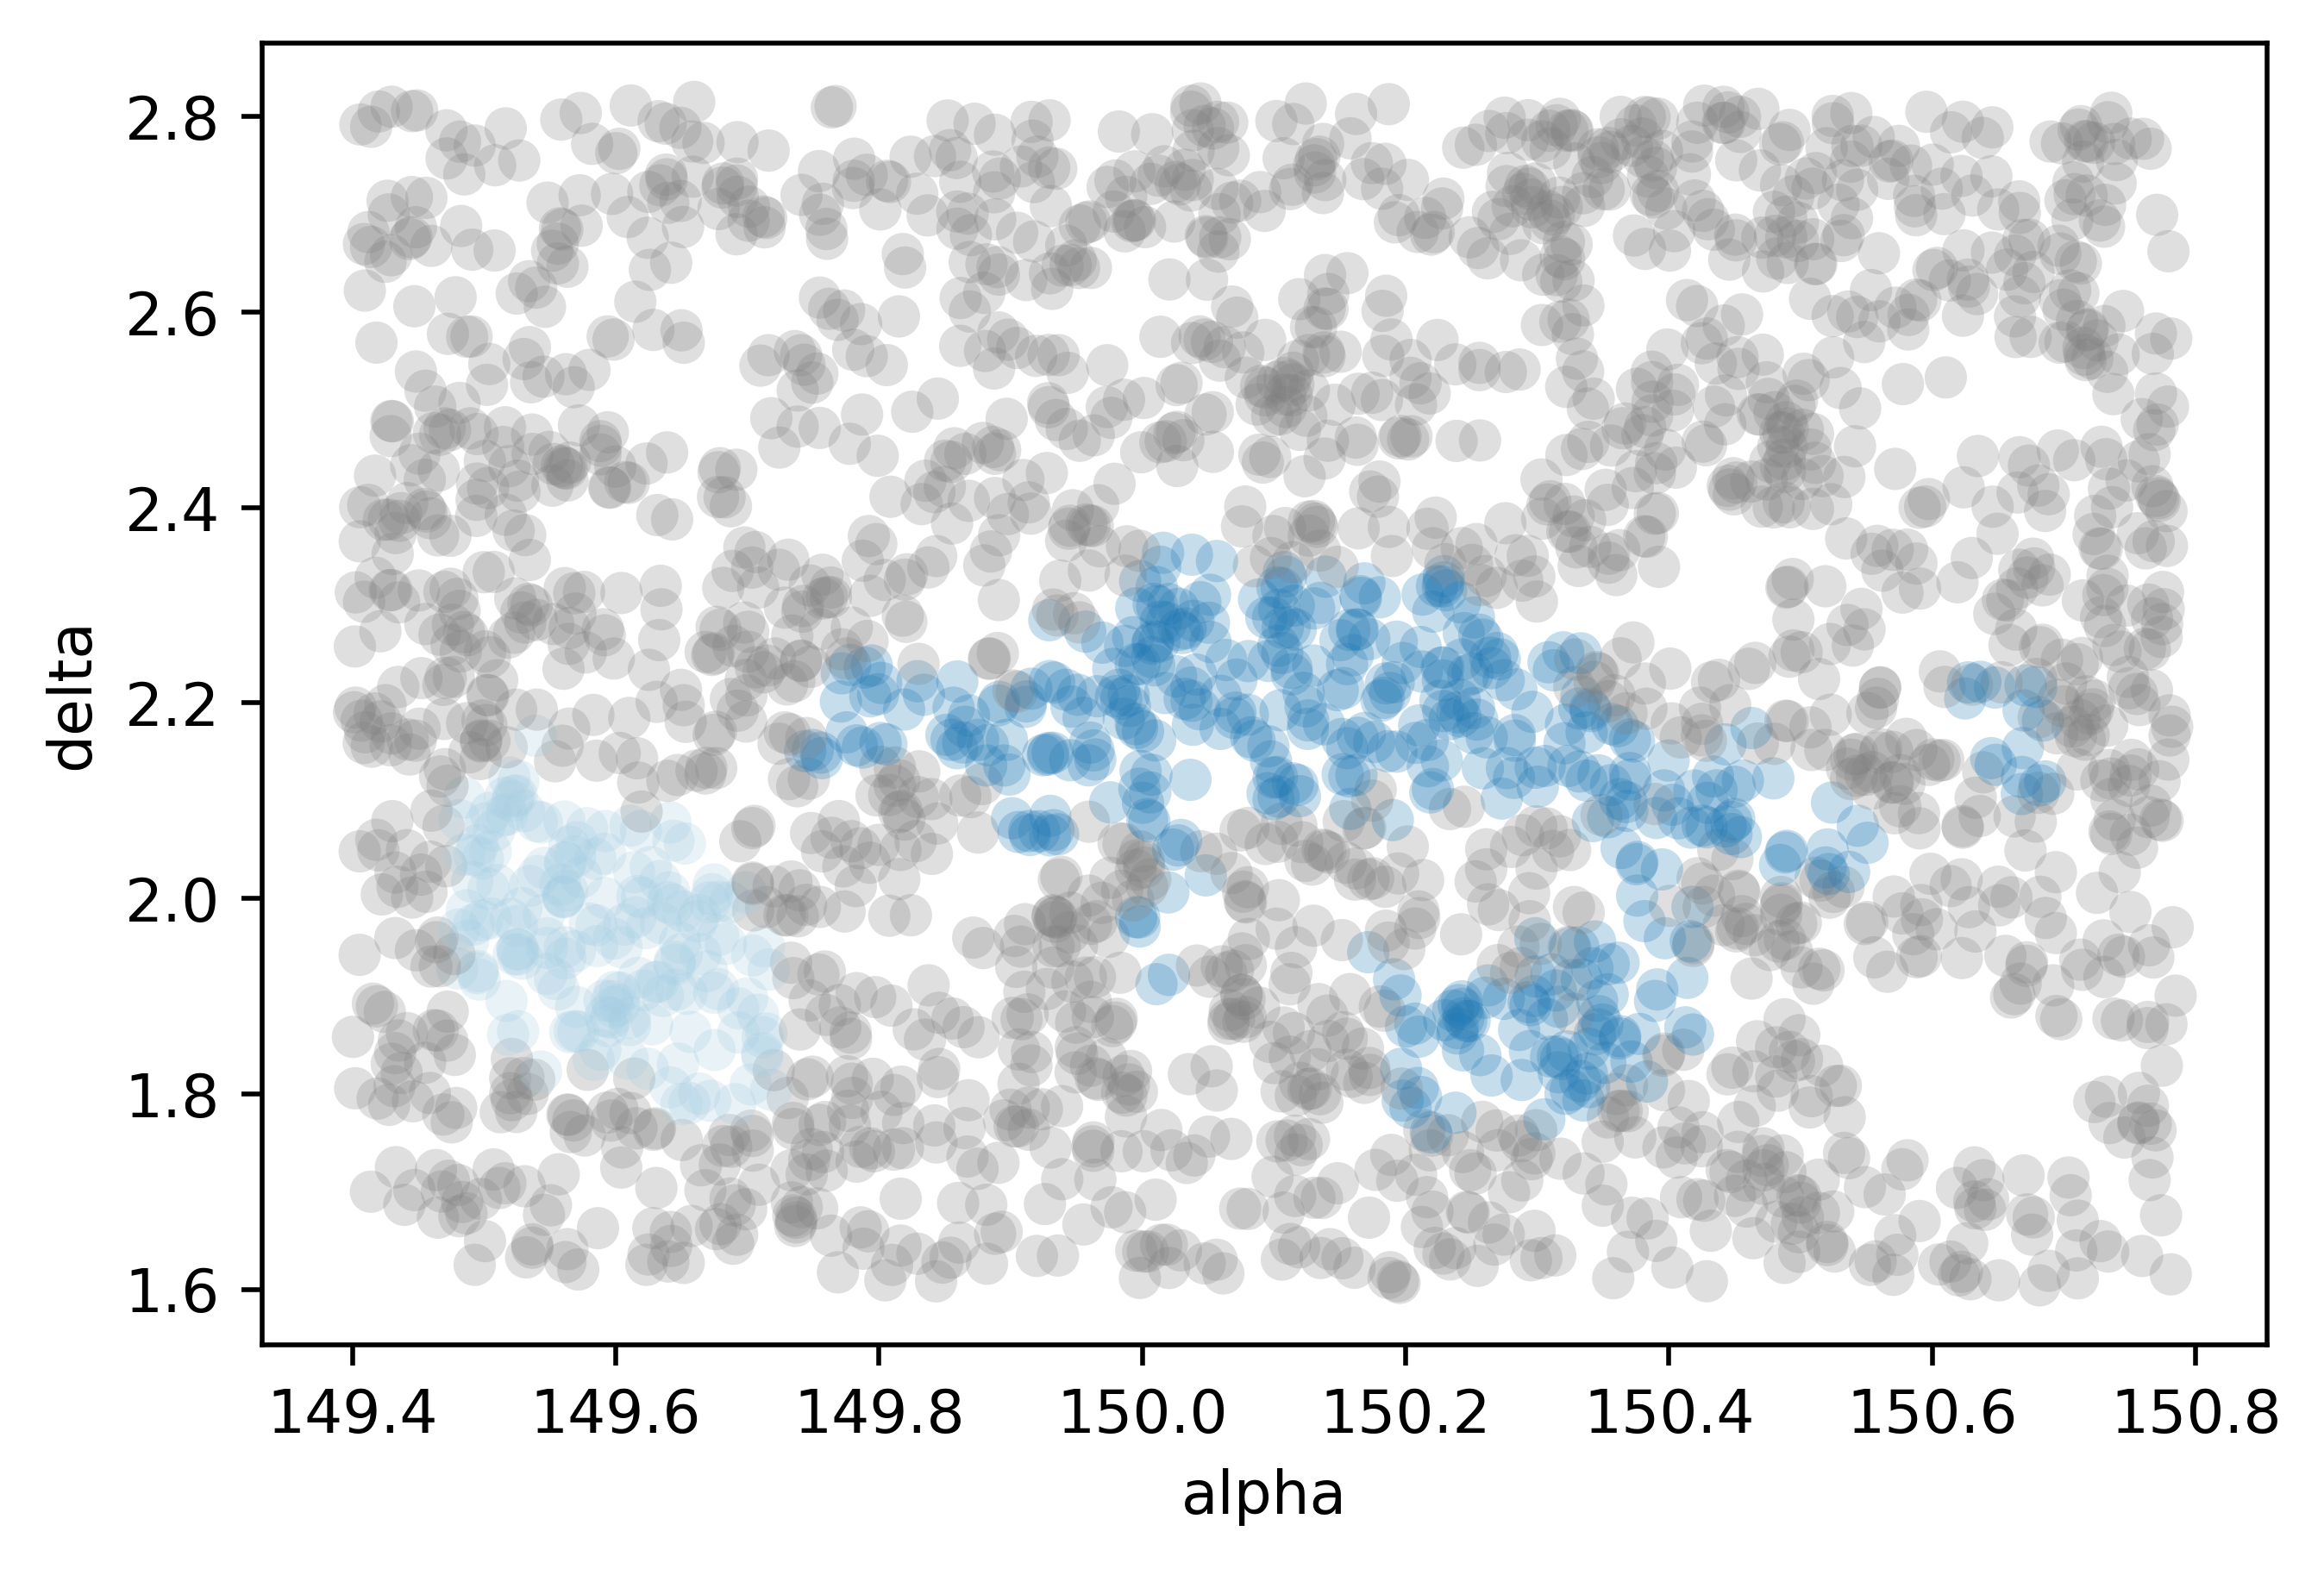

In [704]:
from sklearn.manifold import TSNE
import seaborn as sns
import hdbscan
#projection = TSNE().fit_transform(X)

clusterer = hdbscan.HDBSCAN(min_cluster_size=100,min_samples=100,cluster_selection_epsilon=0.1,
                            prediction_data=True).fit(X)

color_palette = sns.color_palette('Paired', 100)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.figure(dpi=500)
plt.scatter(alook,dlook, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)
plt.xlabel('alpha')
plt.ylabel('delta')



In [683]:
#sky position of cluster
catalog = SkyCoord(ra=anan*u.degree, dec=dnan*u.degree)  
print(catalog)
#goes through all alpha,delta points chosen       


#get median/mean position of clusters
clustercorr=[0]*(clusterer.labels_.max()+1)
clusterlog=[0]*(clusterer.labels_.max()+1)

for i in range(0,clusterer.labels_.max()+1):
    clustercorr[i]=[np.median(alook[clusterer.labels_ == i]),np.median(dlook[clusterer.labels_ == i])]
    clusterlog[i] = SkyCoord(ra=alook[clusterer.labels_ == i]*u.degree,dec=dlook[clusterer.labels_ == i]*u.degree)

#print(clusterlog[7])

arrlength=len(anan)
#print(arrlength)
idxcatalog=[float('NaN')] * arrlength
q=0

for i in clustercorr:
        scalarc = SkyCoord(i[0]*u.deg, i[1]*u.deg) 
        d2d = scalarc.separation(catalog)#gives distance to all objects on the sky
        siz = scalarc.separation(clusterlog[q])#gives distance to cluster objects
        print(siz)
        catalogmsk = d2d < (siz)*u.deg#multiply by 0.5???
        idxcatalog[q] = [np.where(catalogmsk)[0]]
        #print(idxcatalog[q])
        q=q+1
#One entry in idxcatalog gives all the objects included in the search area, centered around a cluster

#Try to define i as the center position of the cluster (we have idx so we can calculate the mean/median) then define catalog
#as the cluster positions and calculate the separation. Lastly a mask can be applied using the maximum distance from the center
#(plus a bit maybe to include the farthest point?) and then all the redshift peaks and color plots. Remember the full catalog
#is still needed for 

<SkyCoord (ICRS): (ra, dec) in deg
    [(150.75332642, 1.60333002), (150.77496338, 1.60339999),
     (150.7633667 , 1.60346997), ..., (149.84014893, 2.81420994),
     (149.84628296, 2.80824995), (149.84463501, 2.81153011)]>
[0d15m20.701s 0d14m27.0503s 0d10m55.3279s 0d09m55.6529s 0d09m24.0286s
 0d10m14.8338s 0d08m41.3198s 0d09m07.3965s 0d09m18.6348s 0d07m18.9464s
 0d05m58.1872s 0d08m47.4128s 0d08m14.4005s 0d09m55.1636s 0d08m49.8401s
 0d11m00.9621s 0d07m44.2009s 0d05m24.8171s 0d05m50.966s 0d03m29.8659s
 0d01m43.0911s 0d09m33.9857s 0d07m16.0858s 0d11m30.5469s 0d01m00.6248s
 0d02m33.937s 0d13m11.4216s 0d05m52.5273s 0d09m26.9367s 0d04m22.1408s
 0d03m40.1662s 0d04m01.7256s 0d10m13.4332s 0d05m59.9623s 0d06m52.4801s
 0d05m32.1023s 0d09m01.4466s 0d08m30.9412s 0d06m13.6424s 0d12m07.6946s
 0d07m55.2959s 0d11m29.2484s 0d10m42.7293s 0d10m34.9785s 0d11m24.9393s]


UnitConversionError: Can only apply 'less' function to quantities with compatible dimensions

In [656]:
#clusterer.labels_
#clusterer.labels_.max()
Nclu=[0]*(clusterer.labels_.max()+1)
zclu=[0]*(clusterer.labels_.max()+1)

zlook

for i in range(0,clusterer.labels_.max()+1):
    Nclu[i] = np.count_nonzero(clusterer.labels_ == i)
    zclu[i] = np.median(zlook[clusterer.labels_ == i])
    
print(Nclu)
print(zclu)


[45, 23, 45, 14, 32, 10, 12, 34]
[4.504899978637695, 4.5019001960754395, 4.5071001052856445, 4.504199981689453, 4.506249904632568, 4.503350019454956, 4.499750137329102, 4.504999876022339]


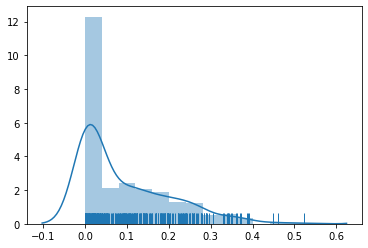

In [602]:
import pandas as pd
sns.distplot(clusterer.outlier_scores_[np.isfinite(clusterer.outlier_scores_)], rug=True)

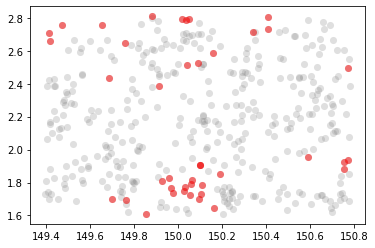

In [603]:
threshold = pd.Series(clusterer.outlier_scores_).quantile(0.9)
outliers = np.where(clusterer.outlier_scores_ > threshold)[0]
plt.scatter(*X.T, s=50, linewidth=0, c='gray', alpha=0.25)
plt.scatter(*X[outliers].T, s=50, linewidth=0, c='red', alpha=0.5)

# Over density plots

In [339]:
from scipy.stats import kde

x=alook
y=dlook
nbins=300
k = kde.gaussian_kde([x,y])
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

In [340]:
print(zi.reshape(xi.shape))

[[0.07166004 0.0754194  0.07926306 ... 0.12465036 0.12110383 0.1175227 ]
 [0.07499356 0.07890818 0.08290904 ... 0.12907489 0.12538789 0.12166591]
 [0.07836798 0.08243865 0.08659742 ... 0.13347672 0.12964878 0.12578553]
 ...
 [0.12923953 0.13345555 0.1376081  ... 0.10512657 0.10170799 0.0982589 ]
 [0.125188   0.12925923 0.1332692  ... 0.10069579 0.09742535 0.09412558]
 [0.12110152 0.12502789 0.12889522 ... 0.09632594 0.09320113 0.09004816]]


In [341]:
from astropy.stats import sigma_clipped_stats
from photutils.datasets import make_100gaussians_image
from photutils import find_peaks
from astropy.visualization import simple_norm
from astropy.visualization.mpl_normalize import ImageNormalize
from photutils import CircularAperture

data = zi.reshape(xi.shape)
#mean, median, std = sigma_clipped_stats(data, sigma=3.0)
#print(mean,median,std)
threshold = 0.70#median + (4. * std)
tbl = find_peaks(data, threshold, box_size=11)
tbl['peak_value'].info.format = '%.8g'  # for consistent table output
tbl # print peaks

x_peak,y_peak,peak_value
int64,int64,float64
56,77,0.76883973
231,95,0.82251075
61,202,0.78379707
107,242,0.79701233


In [342]:
print(xi[tbl['x_peak']][0][0])
print(yi[tbl['y_peak']][0][0])

149.6602465269159
1.605430006980896


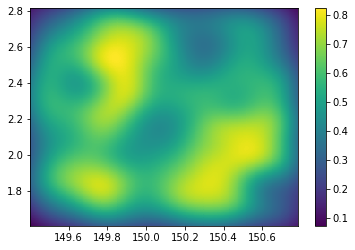

In [344]:
# Make the plot
plt.pcolormesh(xi, yi, zi.reshape(xi.shape))

#positions = np.transpose((xi[tbl['x_peak']], yi[tbl['y_peak']]))
#apertures = CircularAperture(positions, r=6.)
#apertures.plot(color='red', lw=1.0)
#plt.plot(xi[tbl['x_peak']][0][0], yi[tbl['y_peak']][0][0],'r.')

plt.colorbar()
plt.show()

# Selection by area on the sky and then redshift

In [12]:
zcand=np.array([1.62,1.73,1.74,1.87,1.94,2.07,2.07,2.20,2.21,2.23,2.24,2.26,2.36,2.37,2.38,2.39,2.42,2.44,2.45,
      2.48,2.53,2.61,2.62,2.64,2.68,2.69,2.72,2.74,2.74,2.77,2.81,3.01,3.02,3.04,3.04,3.08])
acand=np.array([149.593,150.093,150.343,149.893,150.043,149.709,150.126,149.609,149.843,150.326,149.676,149.859,
      150.693,149.643,150.209,150.476,149.809,149.643,150.076,149.576,150.293,149.509,150.359,150.576,
      150.009,150.343,149.626,149.526,150.309,150.009,150.343,149.943,150.276,149.709,149.909,150.293])
dcand=np.array([1.89,2.207,2.407,1.907,2.174,2.007,2.24,1.774,1.807,1.89,2.007,1.94,2.19,1.974,1.707,2.657,2.124,
      2.674,2.274,1.957,2.324,1.907,2.674,2.674,2.207,2.557,2.324,1.907,2.507,1.974,2.64,1.774,2.324,
      1.907,2.007,2.507])
corr=[0]*len(acand)
for i in range(0,len(acand)):
    corr[i]=[acand[i],dcand[i]]
print(corr[0][0])

149.593


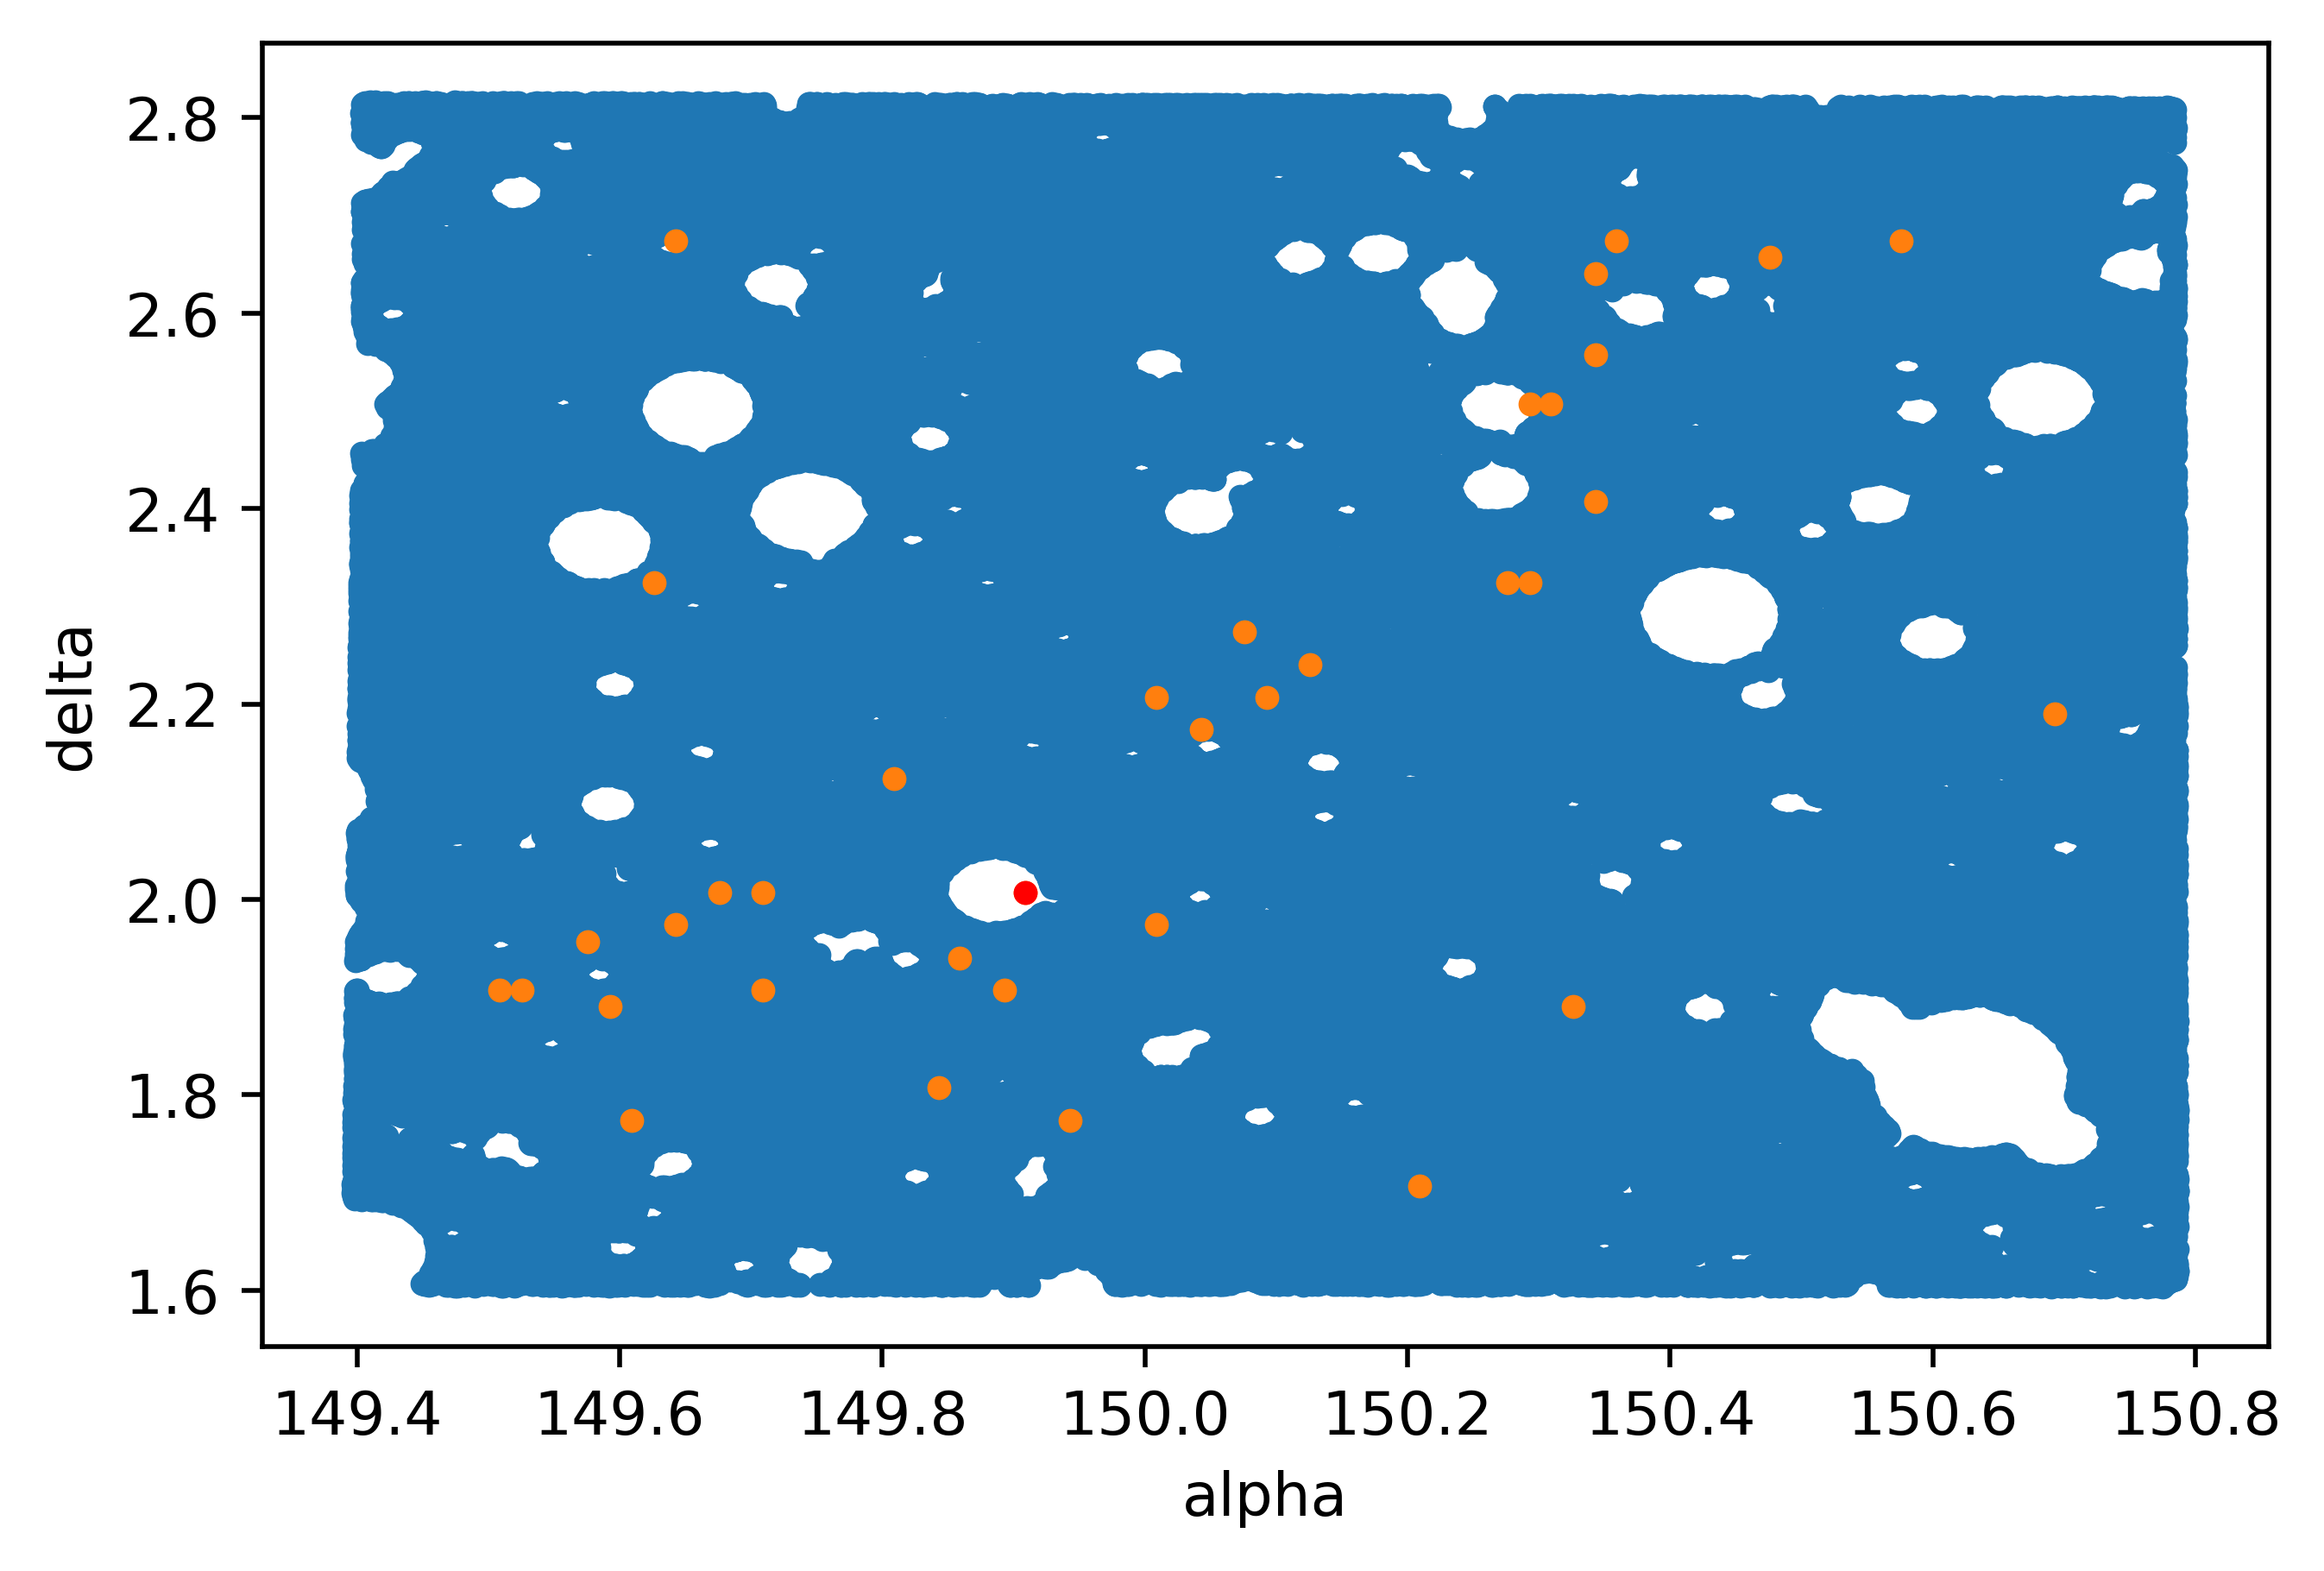

In [13]:
plt.figure(dpi=500)
plt.plot(a,d,'.')
plt.plot(acand,dcand,'.')
plt.xlabel('alpha')
plt.ylabel('delta')
plt.plot(acand[34],dcand[34],'r.')

In [657]:


catalog = SkyCoord(ra=anan*u.degree, dec=dnan*u.degree)  
siz=0.04#size used to look for objects close by, should be 2X the size of catalogmask size???
arrlength=(len(np.arange(min(anan),max(anan),siz))*len(np.arange(min(dnan),max(dnan),siz)))

print(arrlength)

idxcatalog=[float('NaN')] * arrlength
q=0

#thearange=np.arange(min(anan),max(anan),siz)
#thedrange=np.arange(min(dnan),max(dnan),siz)

#goes though all alpha/delta combinations
#for i in therange:
#    for w in thedrange:
#        scalarc = SkyCoord(i*u.deg, w*u.deg) 
#        d2d = scalarc.separation(catalog)
#        catalogmsk = d2d < siz*u.deg#multiply by 0.5???
#        idxcatalog[q] = [np.where(catalogmsk)[0]]
#        print(idxcatalog[q])
#        q=q+1

#goes through all alpha,delta points chosen       
corr=[[150.197509,2.003213]]

for i in corr:
        #print(i[0])
        scalarc = SkyCoord(i[0]*u.deg, i[1]*u.deg) 
        d2d = scalarc.separation(catalog)
        catalogmsk = d2d < (siz)*u.deg#multiply by 0.5???
        idxcatalog[q] = [np.where(catalogmsk)[0]]
        print(idxcatalog[q])
        q=q+1
#One entry in idxcatalog gives all the objects included in the search area

#Try to define i as the center position of the cluster (we have idx so we can calculate the mean/median) then define catalog
#as the cluster positions and calculate the separation. Lastly a mask can be applied using the maximum distance from the center
#(plus a bit maybe to include the farthest point?) and then all the redshift peaks and color plots. Remember the full catalog
#is still needed for 

1085
[array([123608, 123655, 123768, ..., 152872, 152929, 153722], dtype=int64)]


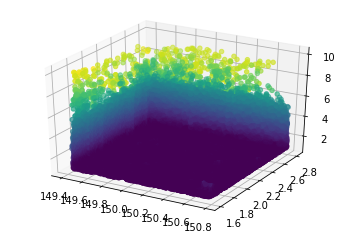

In [277]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(anan, dnan, znan, c=znan);

<ipython-input-200-f8f745391d76>:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  plt.plot(anan[idxcatalog[ch]],dnan[idxcatalog[ch]],'.')


Text(0, 0.5, 'delta')

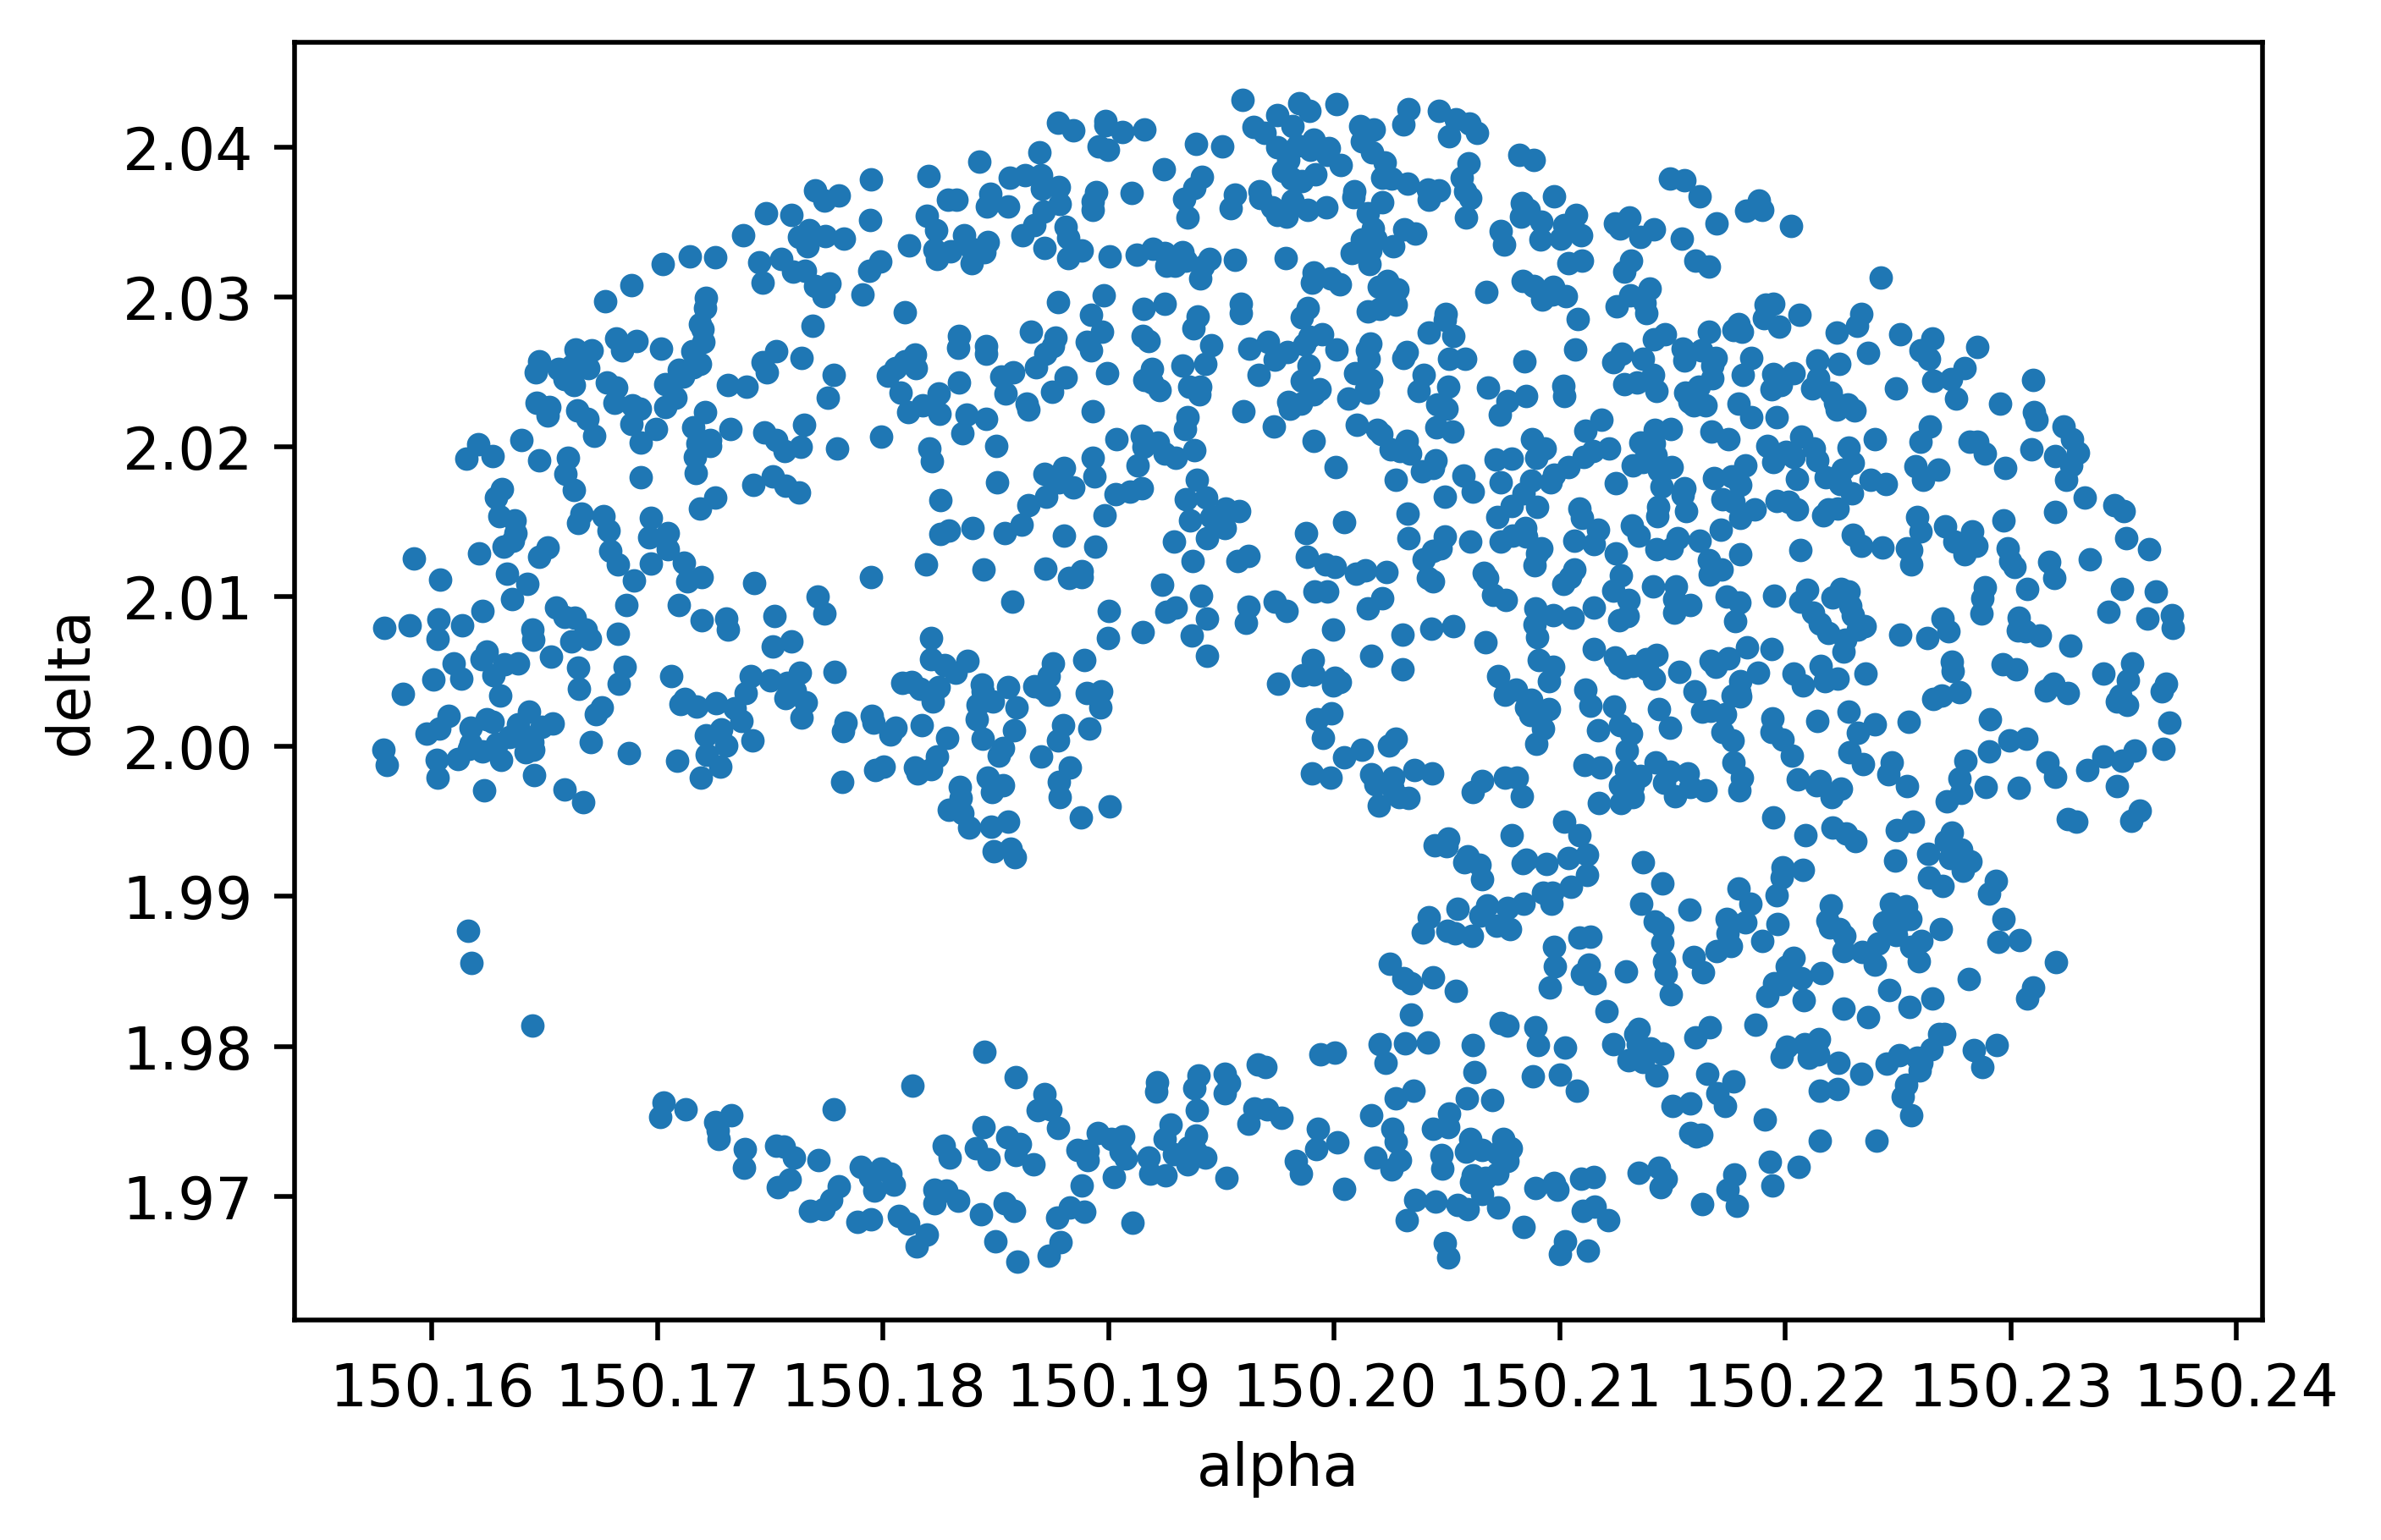

In [200]:
ch=0#choses search region to look at
plt.figure(dpi=500)
plt.plot(anan[idxcatalog[ch]],dnan[idxcatalog[ch]],'.')
plt.xlabel('alpha')
plt.ylabel('delta')

In [253]:
def find_peaks(a):
  x = np.array(a)
  max = np.max(x)
  lenght = len(a)
  ret = []
  for i in range(lenght):
      ispeak = True
      if i-1 > 0:
          ispeak &= (x[i] > 1.25 * x[i-1] and x[i]>5)
      if i+1 < lenght:
          ispeak &= (x[i] > 1.25 * x[i+1] and x[i]>5)

      #ispeak &= (x[i] > 0.05 * max)
      if ispeak:
          ret.append(i)
  return ret

Center of redshift bins for peaks:
[2.65240004 3.55240004 4.75240004 4.95240004]


<ipython-input-254-b0542ebbf511>:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  counts, edges, plot=plt.hist(znan[idxcatalog[ch]],bins=np.arange(min(znan[idxcatalog[ch]]), max(znan[idxcatalog[ch]]) + binwidth, binwidth))


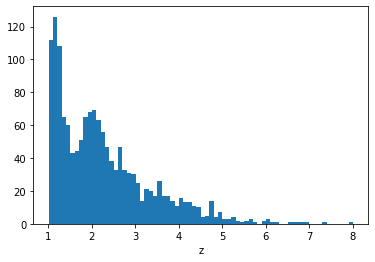

In [254]:
import scipy.stats
from scipy.stats import norm
from scipy.optimize import curve_fit

binwidth=0.1
#print(np.arange(min(znan[idxcatalog[ch]]), max(znan[idxcatalog[ch]]) + binwidth, binwidth))
counts, edges, plot=plt.hist(znan[idxcatalog[ch]],bins=np.arange(min(znan[idxcatalog[ch]]), max(znan[idxcatalog[ch]]) + binwidth, binwidth))
plt.xlabel('z')
bincenters = np.mean(np.vstack([edges[0:-1],edges[1:]]), axis=0)
#print(bincenters)


peaks=find_peaks(counts)
#print(peaks)

#print(counts)
print('Center of redshift bins for peaks:')
print(bincenters[peaks])
#print(edges[peaks])

In [261]:
zsearch=4.7524#np.median(znan[idxcatalog[ch]])#redshift used to search for cluster
zsiz=binwidth#0.1#allowed difference in z 

ztemp=znan[idxcatalog[ch]][znan[idxcatalog[ch]]<zsearch+zsiz]
zclu=ztemp[ztemp>zsearch-zsiz]#array of z for the cluster

atemp=anan[idxcatalog[ch]][znan[idxcatalog[ch]]<zsearch+zsiz]
aclu=atemp[ztemp>zsearch-zsiz]#array of alpha for the cluster

dtemp=dnan[idxcatalog[ch]][znan[idxcatalog[ch]]<zsearch+zsiz]
dclu=dtemp[ztemp>zsearch-zsiz]#array of delta for the cluster

Gtemp=Gnan[idxcatalog[ch]][znan[idxcatalog[ch]]<zsearch+zsiz]
Gclu=Gtemp[ztemp>zsearch-zsiz]#array of G mag for the cluster

Rtemp=Rnan[idxcatalog[ch]][znan[idxcatalog[ch]]<zsearch+zsiz]
Rclu=Rtemp[ztemp>zsearch-zsiz]#array of delta for the cluster

Itemp=Inan[idxcatalog[ch]][znan[idxcatalog[ch]]<zsearch+zsiz]
Iclu=Itemp[ztemp>zsearch-zsiz]#array of delta for the cluster

Jtemp=Jnan[idxcatalog[ch]][znan[idxcatalog[ch]]<zsearch+zsiz]
Jclu=Jtemp[ztemp>zsearch-zsiz]#array of delta for the cluster

Htemp=Hnan[idxcatalog[ch]][znan[idxcatalog[ch]]<zsearch+zsiz]
Hclu=Htemp[ztemp>zsearch-zsiz]#array of delta for the cluster

Ktemp=Knan[idxcatalog[ch]][znan[idxcatalog[ch]]<zsearch+zsiz]
Kclu=Ktemp[ztemp>zsearch-zsiz]#array of delta for the cluster

#print(zclu)
#for i in range 

<ipython-input-261-e4ab17d8b0ce>:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  ztemp=znan[idxcatalog[ch]][znan[idxcatalog[ch]]<zsearch+zsiz]
<ipython-input-261-e4ab17d8b0ce>:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  atemp=anan[idxcatalog[ch]][znan[idxcatalog[ch]]<zsearch+zsiz]
<ipython-input-261-e4ab17d8b0ce>:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which w

# Color-color and color-mag plots

In [ ]:
#Needs new appearant mags and selection criteria from paper

Text(0, 0.5, 'J-K')

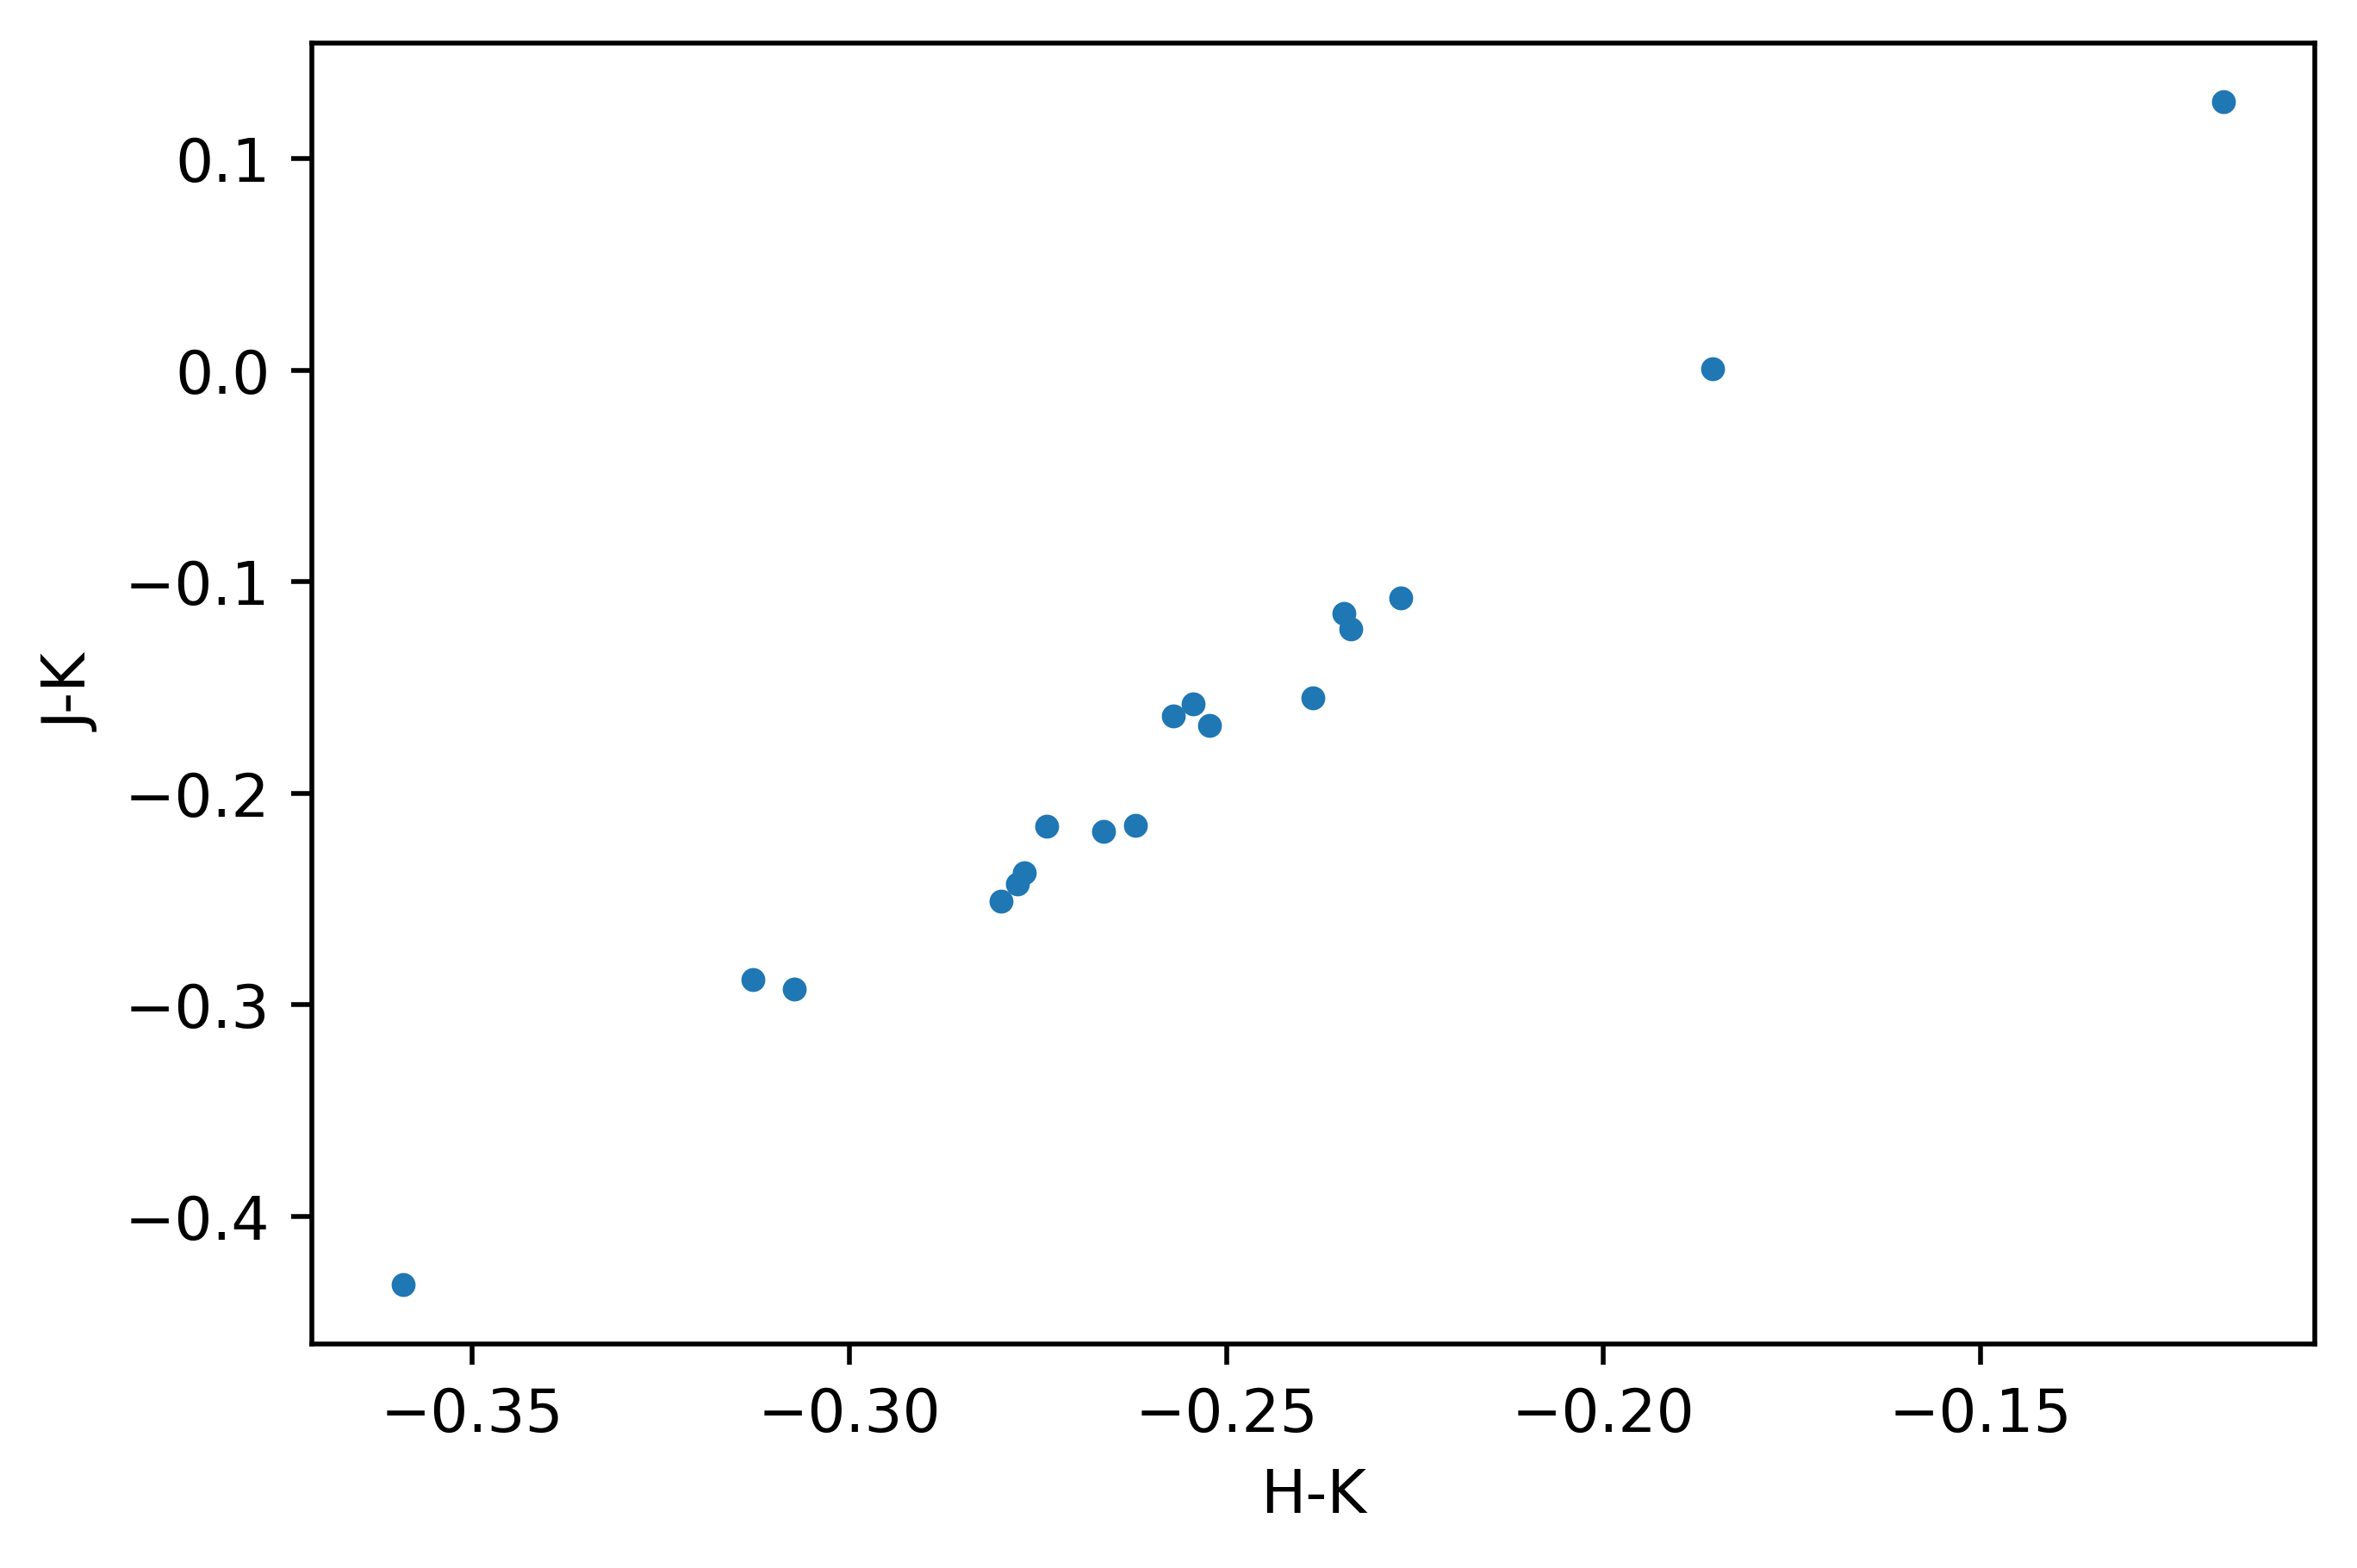

In [262]:
plt.figure(dpi=500)
plt.plot(Hclu-Kclu,Jclu-Kclu,'.')
#plt.plot(Hclu[zclu<np.median(zclu)]-Kclu[zclu<np.median(zclu)],Jclu[zclu<np.median(zclu)]-Kclu[zclu<np.median(zclu)],'b.')
#plt.plot(Hclu[zclu>np.median(zclu)]-Kclu[zclu>np.median(zclu)],Jclu[zclu>np.median(zclu)]-Kclu[zclu>np.median(zclu)],'r.')
plt.xlabel('H-K')
plt.ylabel('J-K')

Text(0, 0.5, 'J-K')

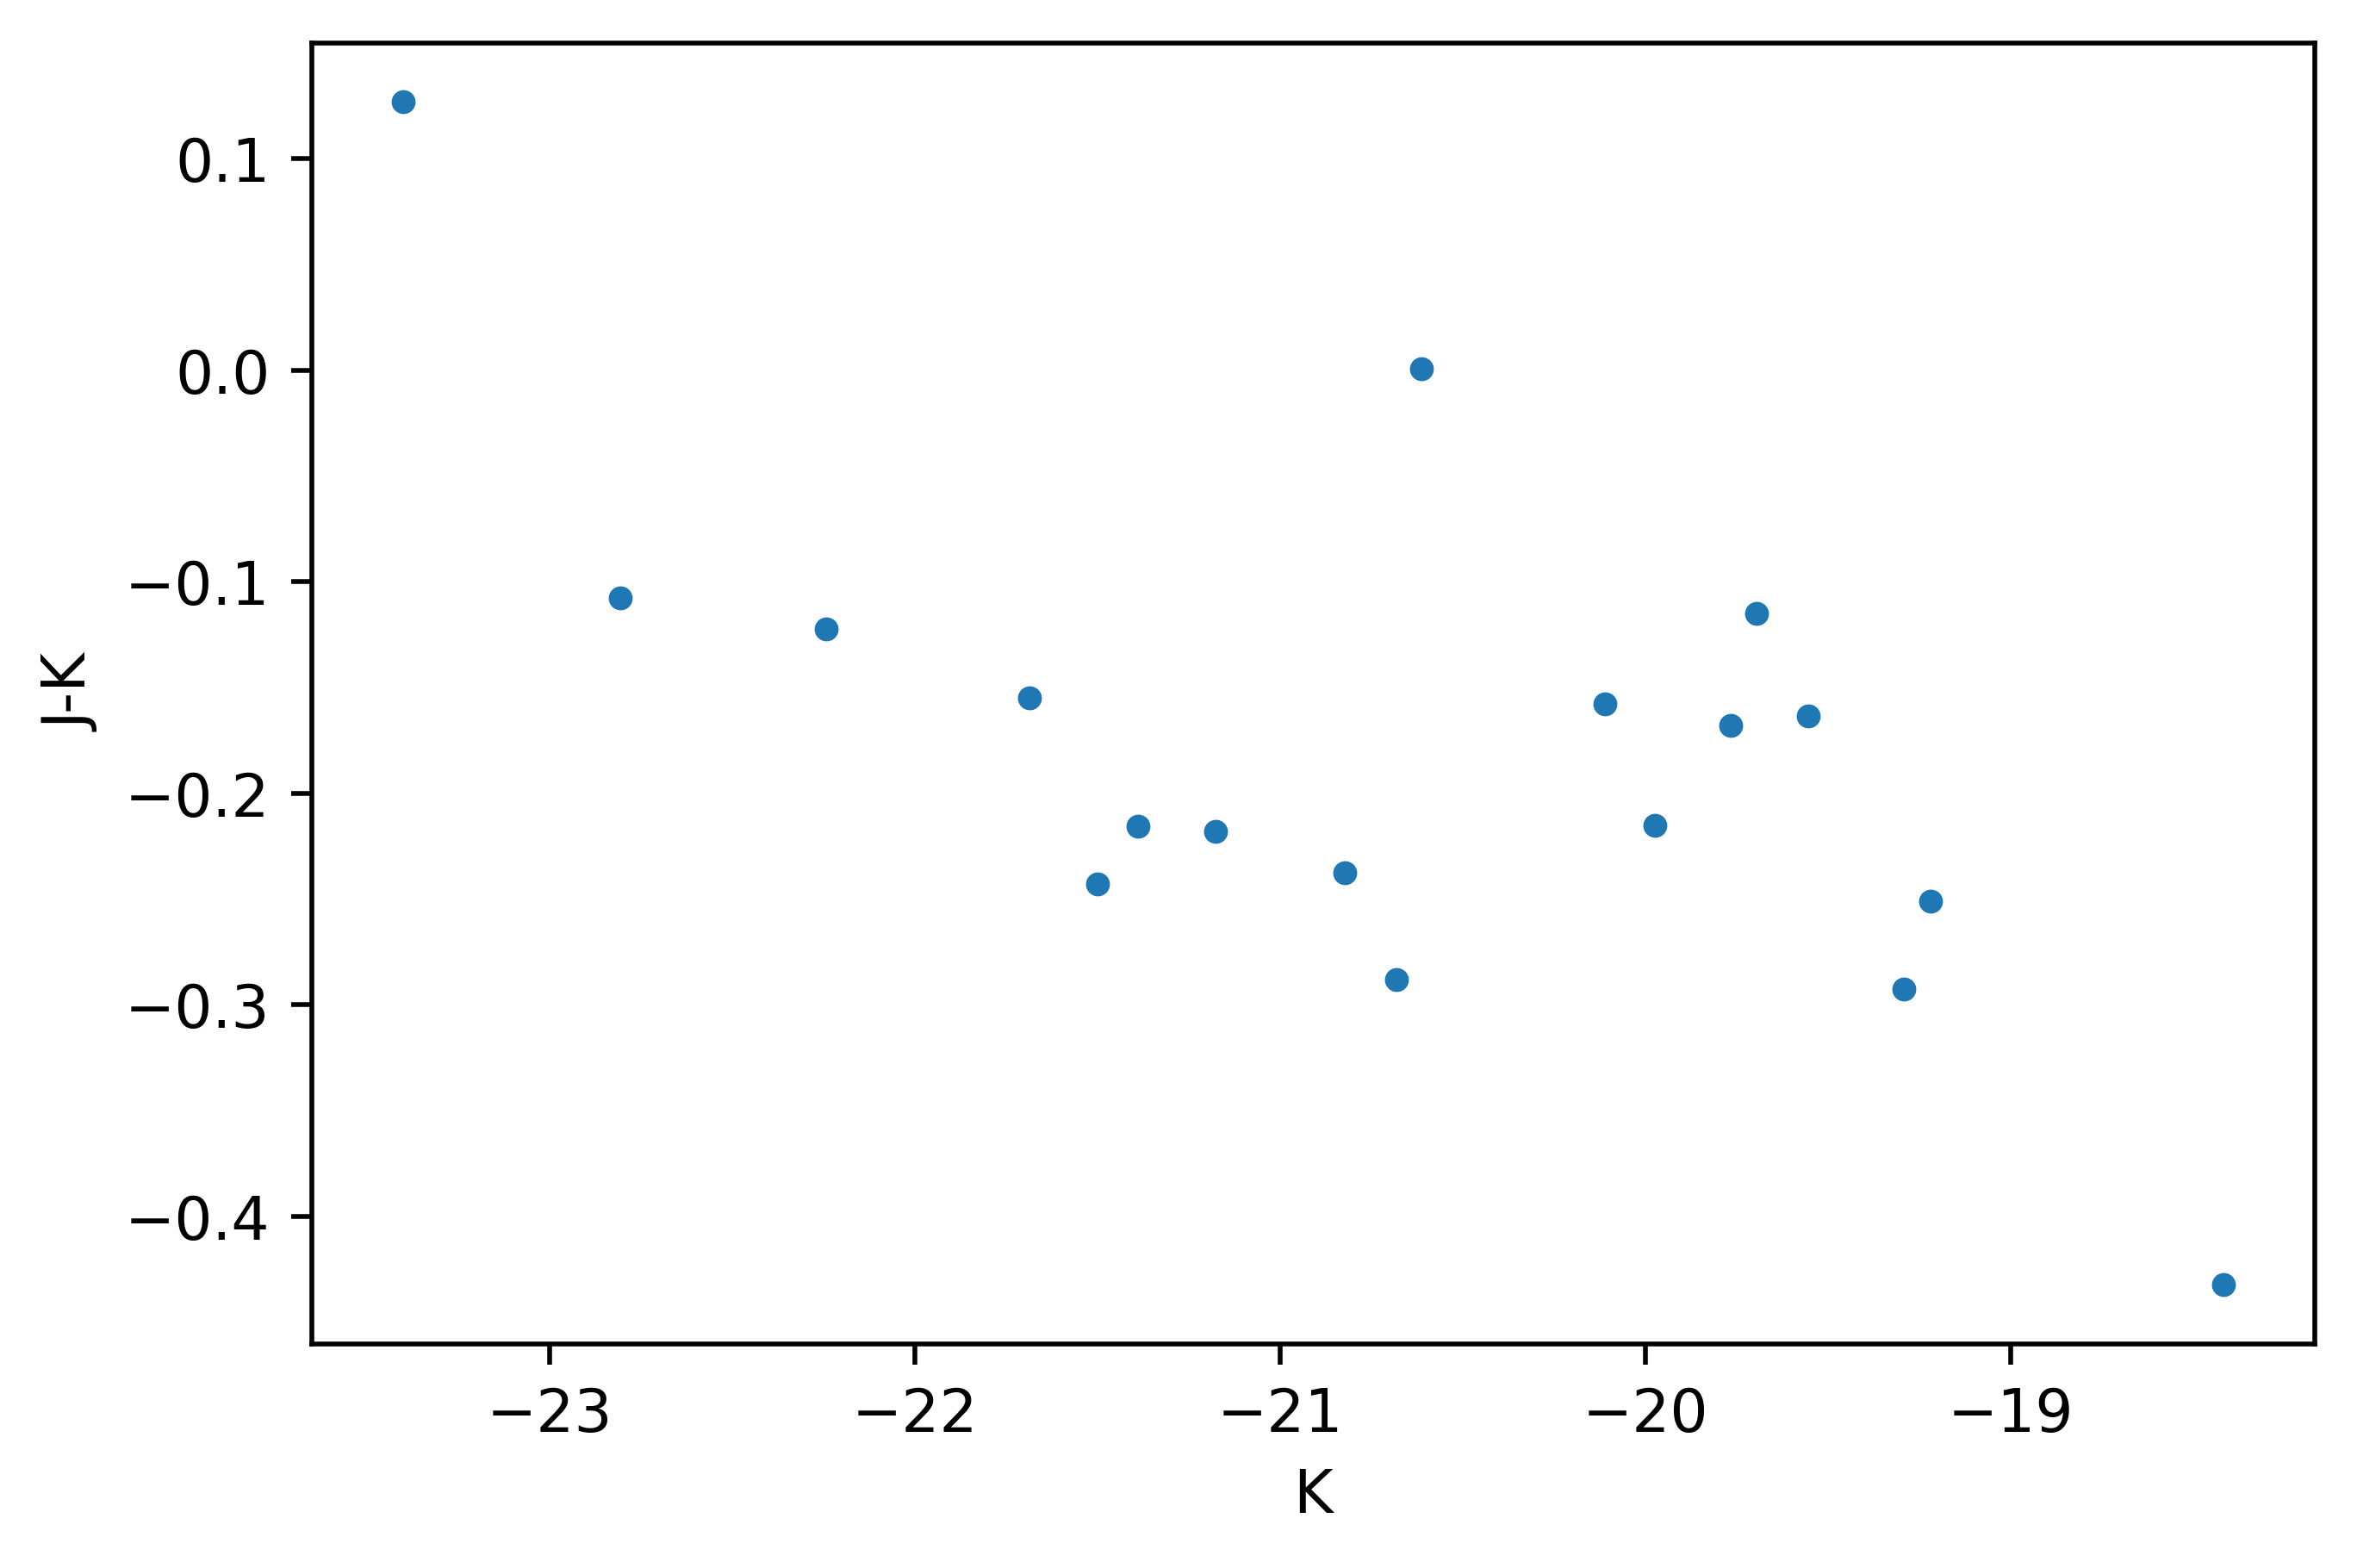

In [263]:
plt.figure(dpi=500)
plt.plot(Kclu,Jclu-Kclu,'.')
#plt.plot(Kclu[zclu<2.0],Jclu[zclu<2.0]-Kclu[zclu<2.0],'b.')
#plt.plot(Kclu[zclu>2.0],Jclu[zclu>2.0]-Kclu[zclu>2.0],'r.')
plt.xlabel('K')
plt.ylabel('J-K')

Text(0, 0.5, 'r-g')

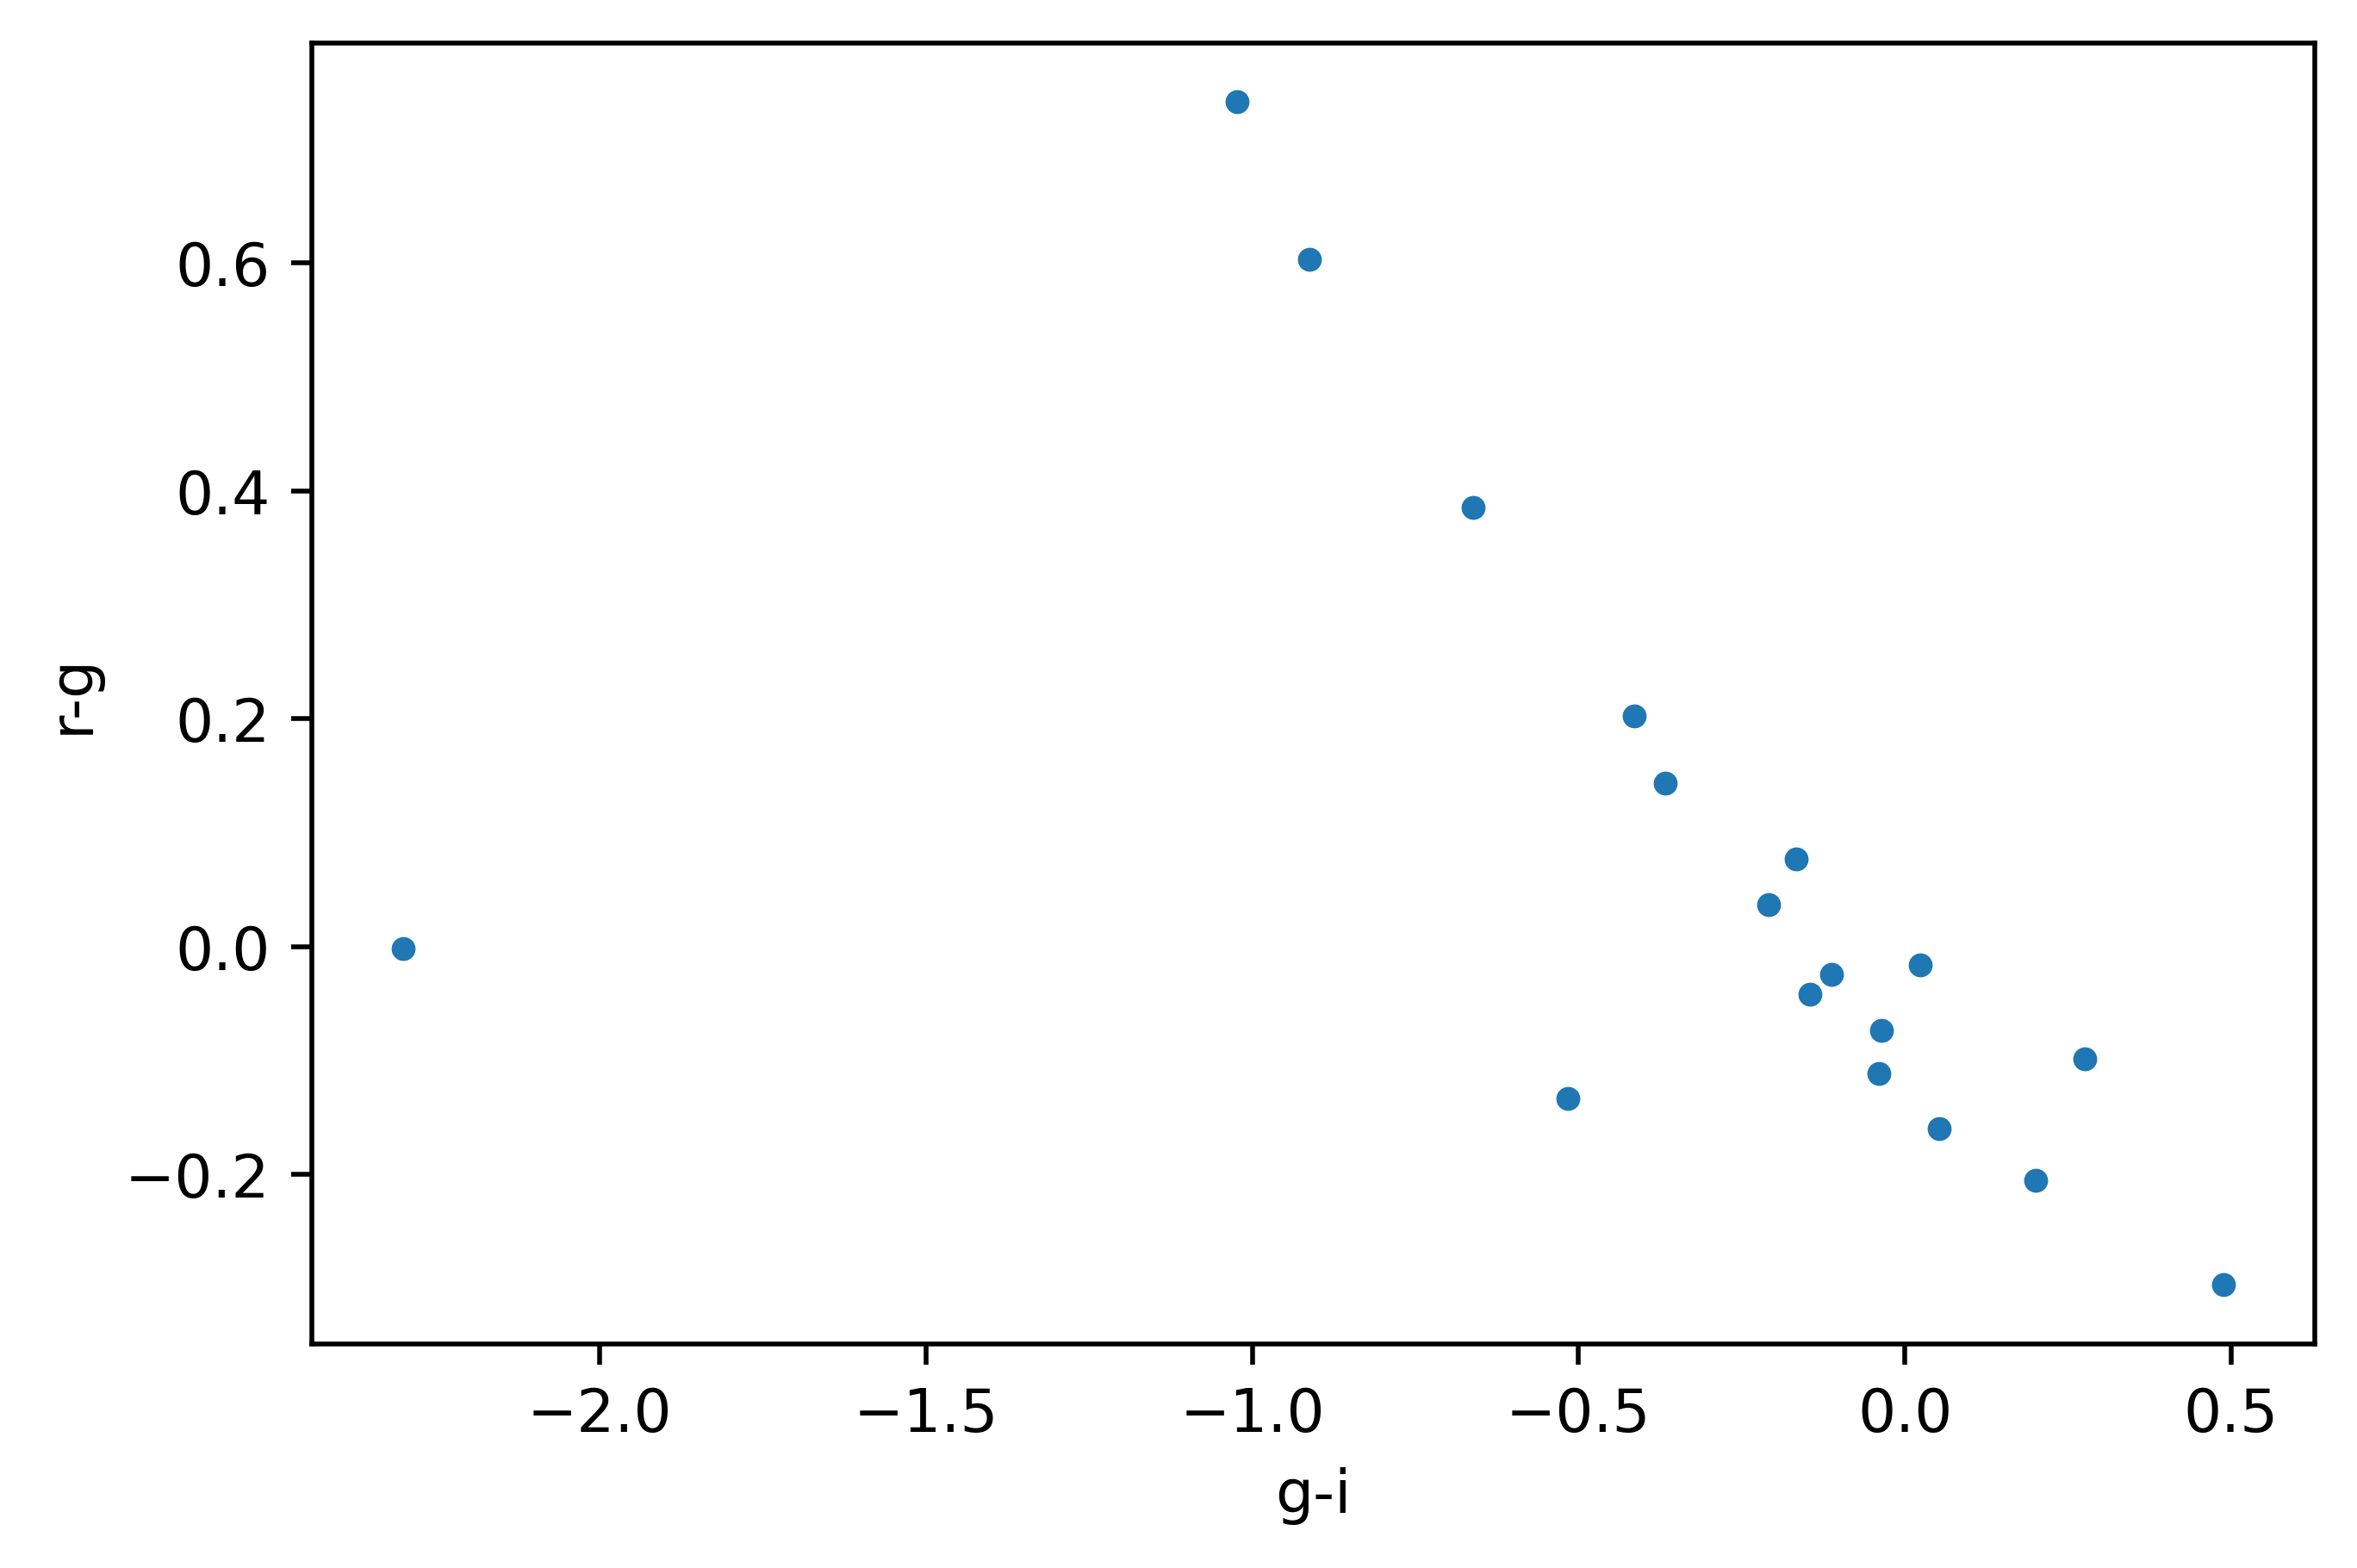

In [264]:
plt.figure(dpi=500)
plt.plot(Gclu-Iclu,Rclu-Gclu,'.')
plt.xlabel('g-i')
plt.ylabel('r-g')

Text(0, 0.5, 'r-g')

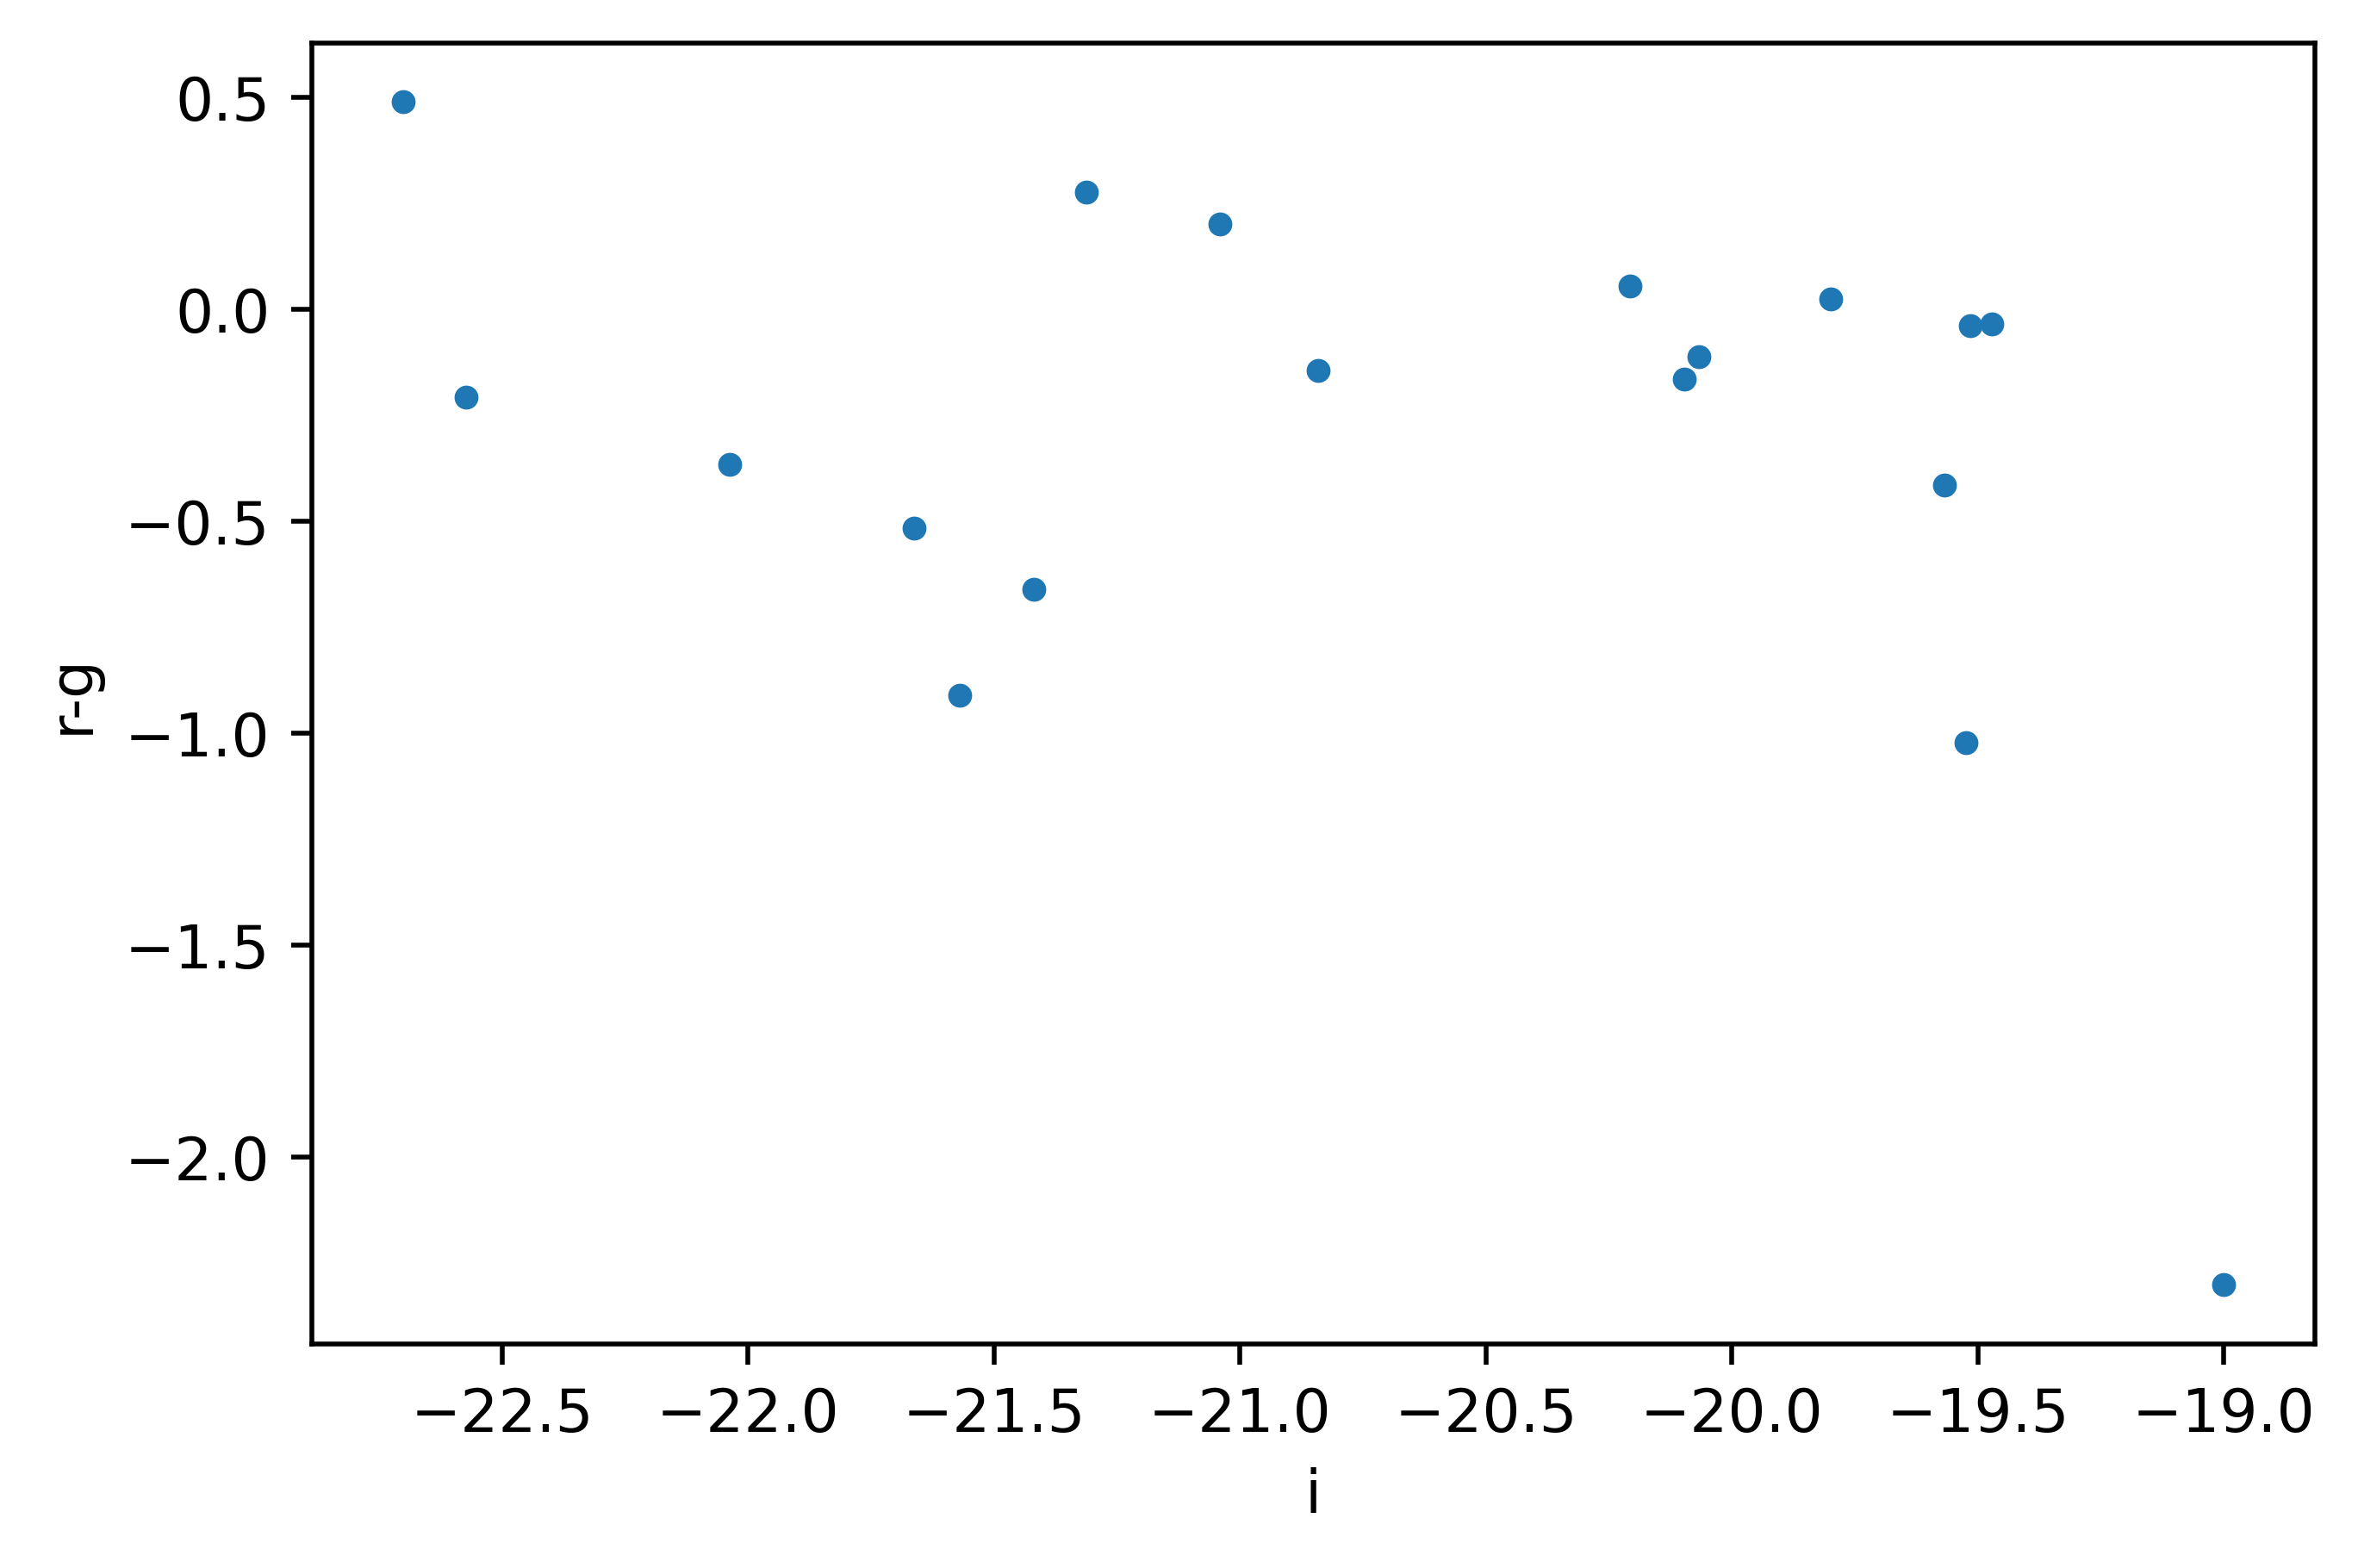

In [266]:
plt.figure(dpi=500)
plt.plot(Iclu,Gclu-Iclu,'.')
plt.xlabel('i')
plt.ylabel('r-g')